# Computer Vision & Deep Learning - Generative AI & Visual Synthesis

# Exercise 4: Convolutional Neural Networks

**Due on 24.05.2024., 10:00**

## Important notes

- Email: Frequently check your email address registered for Moodle. All notifications regarding the course will be sent via Moodle.
- Moodle: Please use the Moodle platform and post your questions to the forum. They will be answered by us or your fellow students.
-  Submission: Put your code and potentially other materials inside a single ZIP file. If you use jupyter notebooks, please always create a PDF file and include it in your ZIP file. The final submission should therefore be a **single zip** file with a **PDF of your code** and the **original code** inside. The ZIP file should contain your surname and your matriculation number (Surname-MatriculationNumber.zip). Submissions that fail to follow the naming convention will not be graded!

In [44]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms as T

# fix size of images for matplot 
plt.rcParams['figure.figsize'] = [10, 5]

RESULTS_DIR = 'results'

In [45]:
# Create results directory
if not os.path.exists(RESULTS_DIR):
    os.makedirs(RESULTS_DIR)

---
## Task 1:  Convolutions Revisited

**Compute the output of a 2D-convolution operation with 3
different filters of kernel size 2 ×2 defined by the following weight matrices and
biases**

ReLU activtion

\begin{align}
\begin{equation}

Relu(z) = max(0, z)

\end{equation}
\end{align}


### Manual Calculation

1. **Using s = 1 (stride) and p = 0 (padding), calculate by hand the output of the convolution operation followed by the ReLU activation function.**

**Input matrix**

x = 
$$
\begin{align*}
\begin{bmatrix}
1 & 0 & 0 & 1 & 1 & 0 \\
0 & 1 & 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
\end{align*}
$$

**Weight Matrices**

w1 = 
$$
\begin{align*}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\end{align*}
$$

w2 = 
$$
\begin{align*}
\begin{bmatrix}
1 & 0 \\
1 & 0
\end{bmatrix}
\end{align*}
$$

w3 = 
$$
\begin{align*}
\begin{bmatrix}
1 & 1 \\
0 & 0
\end{bmatrix}
\end{align*}
$$

**Bias Vectors**

b1 = [-1]

b2 = [-1]

b3 = [-1]

#### Result for Filter W1 with S=1 (stride) and P=0 (padding)

a11 = 1*1 + 1*0 + 0*1 + 1*1 = 2 
a12 = 0*1 + 1*0 + 1*1 + 0*1 = 1 
a13 = 0*1 + 0*0 + 0*1 + 1*1 = 1
a14 = 1*1 + 1*0 + 1*1 + 0*1 = 2
a15 = 1*1 + 0*0 + 0*1 + 0*1 = 1

a21 = 0*1 + 0*0 + 1*1 + 0*1 = 1
a22 = 1*1 + 0*0 + 0*1 + 0*1 = 1
a23 = 0*1 + 0*0 + 1*1 + 1*1 = 2
a24 = 0*1 + 1*0 + 0*1 + 0*1 = 0
a25 = 0*1 + 1*0 + 1*1 + 0*1 = 1

a31 = 0*1 + 1*0 + 1*1 + 0*1 = 1
a32 = 0*1 + 0*0 + 0*1 + 0*1 = 0
a33 = 1*1 + 0*0 + 0*1 + 1*1 = 2
a34 = 1*1 + 0*0 + 1*1 + 0*1 = 2
a35 = 0*1 + 1*0 + 0*1 + 1*1 = 1

a41 = 1*1 + 0*0 + 1*1 + 0*1 = 2
a42 = 0*1 + 0*0 + 0*1 + 0*1 = 0
a43 = 0*1 + 1*0 + 0*1 + 0*1 = 0
a44 = 0*1 + 0*0 + 1*1 + 0*1 = 1
a45 = 1*1 + 0*0 + 0*1 + 1*1 = 2

#### Result for (W1 * X)

a1 = 
$$
\begin{align*}
\begin{bmatrix}
2 & 1 & 1 & 2 & 1  \\
1 & 1 & 2 & 0 & 1 \\
1 & 0 & 2 & 2 & 1 \\
2 & 0 & 0 & 1 & 2 \\
\end{bmatrix}
\end{align*}
$$

#### Result for (W1 * X) + B1

a1 = 
$$
\begin{align*}
\begin{bmatrix}
1 & 0 & 0 & 1 & 0  \\
0 & 0 & 1 & -1 & 0 \\
0 & -1 & 1 & 1 & 0 \\
1 & -1 & -1 & 0 & 1 \\
\end{bmatrix}
\end{align*}
$$

#### Result for ReLU(W1*X + B1)

z1 = 
$$
\begin{align*}
\begin{bmatrix}
1 & 0 & 0 & 1 & 0  \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 \\
1 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\end{align*}
$$

#### Result for Filter W2 with S=1 (stride) and P=0 (padding)

a11 = 1*1 + 1*0 + 0*1 + 1*0 = 1
a12 = 0*1 + 1*0 + 1*1 + 0*0 = 1
a13 = 0*1 + 0*0 + 0*1 + 1*0 = 0
a14 = 1*1 + 1*0 + 1*1 + 0*0 = 2
a15 = 1*1 + 0*0 + 0*1 + 0*0 = 1

a21 = 0*1 + 0*0 + 1*1 + 0*0 = 1
a22 = 1*1 + 0*0 + 0*1 + 0*0 = 1
a23 = 0*1 + 0*0 + 1*1 + 1*0 = 1
a24 = 0*1 + 1*0 + 0*1 + 0*0 = 0
a25 = 0*1 + 1*0 + 1*1 + 0*0 = 1

a31 = 0*1 + 1*0 + 1*1 + 0*0 = 1
a32 = 0*1 + 0*0 + 0*1 + 0*0 = 0
a33 = 1*1 + 0*0 + 0*1 + 1*0 = 1
a34 = 1*1 + 0*0 + 1*1 + 0*0 = 2
a35 = 0*1 + 1*0 + 0*1 + 1*0 = 0

a41 = 1*1 + 0*0 + 1*1 + 0*0 = 2
a42 = 0*1 + 0*0 + 0*1 + 0*0 = 0
a43 = 0*1 + 1*0 + 0*1 + 0*0 = 0
a44 = 0*1 + 0*0 + 1*1 + 0*0 = 1
a45 = 1*1 + 0*0 + 0*1 + 1*0 = 1

#### Result for (W2 * X)

a2 =
$$
\begin{align*}
\begin{bmatrix}
1 & 1 & 0 & 2 & 1  \\
1 & 1 & 1 & 0 & 1 \\
1 & 0 & 1 & 2 & 0 \\
2 & 0 & 0 & 1 & 1 \\
\end{bmatrix}
\end{align*}
$$

#### Result for (W2 * X) + B2

a2 =
$$
\begin{align*}
\begin{bmatrix}
0 & 0 & -1 & 1 & 0  \\
0 & 0 & 0 & -1 & 0 \\
0 & -1 & 0 & 1 & -1 \\
1 & -1 & -1 & 0 & 0 \\
\end{bmatrix}
\end{align*}
$$

#### Result for ReLU(W2*X + B1)

z2 =
$$
\begin{align*}
\begin{bmatrix}
0 & 0 & 0 & 1 & 0  \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
\end{align*}
$$


#### Result for Filter W3 with S=1 (stride) and P=0 (padding)

a11 = 1*1 + 1*1 + 0*0 + 1*0 = 2
a12 = 0*1 + 1*1 + 1*0 + 0*0 = 1
a13 = 0*1 + 0*1 + 0*0 + 1*0 = 0
a14 = 1*1 + 1*1 + 1*0 + 0*0 = 2
a15 = 1*1 + 0*1 + 0*0 + 0*0 = 1

a21 = 0*1 + 0*1 + 1*0 + 0*0 = 0
a22 = 1*1 + 0*1 + 0*0 + 0*0 = 1
a23 = 0*1 + 0*1 + 1*0 + 1*0 = 0
a24 = 0*1 + 1*1 + 0*0 + 0*0 = 1
a25 = 0*1 + 1*1 + 1*0 + 0*0 = 1

a31 = 0*1 + 1*1 + 1*0 + 0*0 = 1
a32 = 0*1 + 0*1 + 0*0 + 0*0 = 0
a33 = 1*1 + 0*1 + 0*0 + 1*0 = 1
a34 = 1*1 + 0*1 + 1*0 + 0*0 = 1
a35 = 0*1 + 1*1 + 0*0 + 1*0 = 1

a41 = 1*1 + 0*1 + 1*0 + 0*0 = 1
a42 = 0*1 + 0*1 + 0*0 + 0*0 = 0
a43 = 0*1 + 1*1 + 0*0 + 0*0 = 1
a44 = 0*1 + 0*1 + 1*0 + 0*0 = 0
a45 = 1*1 + 0*1 + 0*0 + 1*0 = 1

#### Result for (W3 * X)

a3 =
$$
\begin{align*}
\begin{bmatrix}
2 & 1 & 0 & 2 & 1 \\
0 & 1 & 0 & 1 & 1\\
1 & 0 & 1 & 1 & 1\\
1 & 0 & 1 & 0 & 1\\
\end{bmatrix}
\end{align*}
$$

#### Result for (W3 * X) + B3

a3 =
$$
\begin{align*}
\begin{bmatrix}
1 & 0 & -1 & 1 & 0 \\
-1 & 0 & -1 & 0 & 0\\
0 & -1 & 0 & 0 & 0\\
0 & -1 & 0 & -1 & 0\\
\end{bmatrix}
\end{align*}
$$

#### Result for ReLU(W3*X + B1)

z3 =
$$
\begin{align*}
\begin{bmatrix}
1 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0\\
\end{bmatrix}
\end{align*}
$$


### Test against Pytorch Calculation

In [46]:
# plot filters
def plot_filters(filters, titles):
    fig, axs = plt.subplots(1, len(filters))
    for i, (filter, title) in enumerate(zip(filters, titles)):
        # remove batch dimension
        filter = filter.squeeze()
        axs[i].imshow(filter, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(title)
    plt.show()

Activation map 1:
tensor([[[[1., 0., 0., 0., 1.],
          [0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 1.]]]]) 

Activation map 2:
tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 0., 0., 0., 0.]]]]) 

Activation map 3:
tensor([[[[0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.]]]]) 



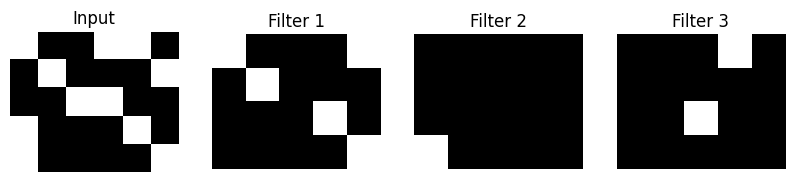

In [47]:
# Define the input tensor
x = torch.tensor([[1., 0., 0., 1., 1., 0.],
                   [0., 1., 0., 0., 0., 1.],
                   [0., 0., 1., 1., 0., 0.],
                   [1., 0., 0., 0., 1., 0.],
                   [1., 0., 0., 0., 0., 1.]])

# Define the filters
w1 = torch.tensor([[1., 0.],
                    [0., 1.]])
w2 = torch.tensor([[1., 0.],
                    [1., 0.]])
w3 = torch.tensor([[1., 1.],
                    [0., 0.]])

# Define the biases
b1 = torch.tensor([-1]).float()
b2 = torch.tensor([-1]).float()
b3 = torch.tensor([-1]).float()

# Add batch and channel dimensions
conv_w1 = F.conv2d(x.unsqueeze(0).unsqueeze(0), w1.unsqueeze(0).unsqueeze(0), bias=b1, stride=1, padding=0)
conv_w2 = F.conv2d(x.unsqueeze(0).unsqueeze(0), w2.unsqueeze(0).unsqueeze(0), bias=b2, stride=1, padding=0)
conv_w3 = F.conv2d(x.unsqueeze(0).unsqueeze(0), w3.unsqueeze(0).unsqueeze(0), bias=b3, stride=1, padding=0)

# Apply the activation function
conv_w1 = F.relu(conv_w1)
conv_w2 = F.relu(conv_w2)
conv_w3 = F.relu(conv_w3)

print(f'Activation map 1:\n{conv_w1} \n')
print(f'Activation map 2:\n{conv_w2} \n')
print(f'Activation map 3:\n{conv_w3} \n')

# plot the results
plot_filters([x, conv_w1, conv_w2, conv_w3], ['Input', 'Filter 1', 'Filter 2', 'Filter 3'])

2. **Think about and describe how the input image patch, the convolution kernel,
and the ReLU activation function interact, and how you can avoid manual
computation and directly infer the output for each patch**


The filter defines an image patch (or window) for a single neuron which itself is a small, localized region of the overall image. It represents features of a neighbouring area or local patterns typical in rasterized image data. A convolution operation involves sliding the kernel comprised of many filters (a small matrix) over a so defined image patch. Then an element-wise multiplication between the kernel's values with the corresponding values in the patch, and adding of the bias term is performed before passing it through a non-linear activation function. ReLU activation is a max-operator which cancels out all negative values whereas allowing positive values without any upper bound. This helps further with the Vanishing Gradient problem commonly observed in networks using sigmoid or tanh activation functions who's gradients are bound between very small zero approaching values. Further ReLU allows, due to its non-linearity, the model to learn more complex non-linear image features. 

Other options

* Kernel Flipping: In the mathematical definition of convolution, the kernel is actually flipped both horizontally and vertically before it is slid over the input patch. 
* Convolution in the Fourier Domain: The convolution operation can also be performed in the frequency domain, rather than the spatial domain. According to the convolution theorem, the convolution of two signals is equivalent to the point-wise multiplication of their Fourier transforms. This can be more efficient than performing the convolution in the spatial domain


3. **Now repeat (a) with s = 2. Please only report the final outputs, not the
intermediate ones before the activation.**

### Results with Filter w1

a11 = 1*1 + 0*0 + 0*1 + 1* 1 = 2
a12 = 0*1 + 1*0+ 0*0 + 1*0 = 0
a13 1*1 + 0*0 + 0*0 + 1*1 = 2
a21 = 0*1 + 0*0 + 1*1 + 0*1 = 1
a22 = 1*1 + 1*0 + 0*0 + 0*0 = 1
a23 = 0*1 + 0*0 + 0*0 + 1*1 = 1


z11 = ReLU(2-1) = 1
z12 = ReLU(0-1) = 0
z13 = ReLU(2-1) = 1
z21 = ReLU(1-1) = 0
z22 = ReLU(1-1) = 0
z23 = ReLU(1-1) = 0


z1 =
$$
\begin{align*}
\begin{bmatrix}
1 & 0 & 1 \\
0 & 0 & 0 \\
\end{bmatrix}
\end{align*}
$$


### Results with Filter w2
z1 =
$$
\begin{align*}
\begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix}
\end{align*}
$$

### Results with Filter w3
z1 =
$$
\begin{align*}
\begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
\end{bmatrix}
\end{align*}
$$


### Test against Pytorch implementation

Activation map 1:
tensor([[[[1., 0., 1.],
          [0., 0., 0.]]]]) 

Activation map 2:
tensor([[[[0., 0., 0.],
          [0., 0., 0.]]]]) 

Activation map 3:
tensor([[[[0., 0., 0.],
          [0., 1., 0.]]]]) 



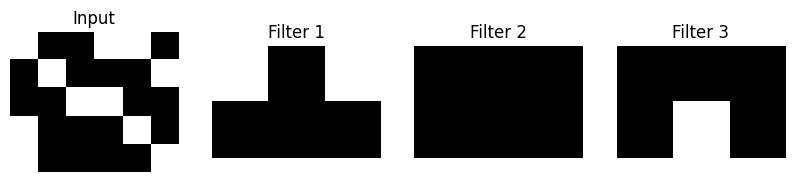

In [48]:
# Perform the convolution operation for each filter
conv_w1 = F.conv2d(x.unsqueeze(0).unsqueeze(0), w1.unsqueeze(0).unsqueeze(0), bias=b1, stride=2, padding=0)
conv_w2 = F.conv2d(x.unsqueeze(0).unsqueeze(0), w2.unsqueeze(0).unsqueeze(0), bias=b2, stride=2, padding=0)
conv_w3 = F.conv2d(x.unsqueeze(0).unsqueeze(0), w3.unsqueeze(0).unsqueeze(0), bias=b3, stride=2, padding=0)

# Apply the activation function
conv_w1 = F.relu(conv_w1)
conv_w2 = F.relu(conv_w2)
conv_w3 = F.relu(conv_w3)

print(f'Activation map 1:\n{conv_w1} \n')
print(f'Activation map 2:\n{conv_w2} \n')
print(f'Activation map 3:\n{conv_w3} \n')

# plot the results
plot_filters([x, conv_w1, conv_w2, conv_w3], ['Input', 'Filter 1', 'Filter 2', 'Filter 3'])

4. **What might be the purpose of using s = 2? What other operation can be
used instead for the same purpose? Hint: Think about compression.**

This is a form of downsampling, also known as subsampling. Alternatively we can use pooling e.g. max-pooling. The purpose of downsampling is to reduce the spatial size of the input image or feature map, which can help to reduce the number of parameters and computations in the network, and to make the network more invariant to small translations of the input.

Further a larger stride can increase the receptive field of the neurons in the subsequent layers

5. **Please derive the general formula to compute the output size of a convolution
operation (size of the feature map), depending on the kernel size, the stride,
and padding. It is sufficient to derive it for the 1D case.**

Convolution Operation Output Size Formula (1D Case)

Input Size
\begin{equation}
    I_n = w_{in} \times h_{in} \times d_{in}
\end{equation}

Output size:
\begin{equation}
    O_n = \left\lfloor\frac{W - F + 2P}{S}\right\rfloor + 1
\end{equation}

Output depth:
\begin{equation}
    d_{out} = K
\end{equation}

Where:

* $W$ is the input width
* $F$ is the filter (kernel) size
* $K$ is the number of output channels (or filters)
* $P$ is the padding
* $S$ is the stride



---
## Task 2: Receptive Field
The receptive field of a neuron in a Convolutional Neural Network (CNN) is the
size of the image region that is connected to the neuron

1. **Suppose that we have a CNN with 3 convolutional layers with a kernel size
of 3 × 3 and s = 1. Calculate the receptive field of a neuron after the last
convolutional layer.**

* Conv_Layer 0: $RF = 3 \times 3$                      --> since the input is the original image 3x3
* Conv_Layer 1: $RF = (3 − 1) \times 1 + 3 = 5$
* Conv_Layer 2: $RF = (5 - 1) \times 1 + 3 \times 3 = 7$

The receptive field is 7 x 7

2. **Suppose that we have a CNN with 2 convolutional layers with a kernel size
of 4 × 4 and s = 2. Calculate the receptive field of a neuron after the last
convolutional layer.**

* Conv_Layer 0: $RF = 4 \times 4$ --> since the input is the original image 4x4
* Conv_Layer 1: $RF = (4 - 1) \times 2 + 4 \times 4 = 10$


The receptive field is 10 x 10

3. **Based on your findings, how is the depth related to the receptive field of a
CNN?** 

The depth of a CNN, or the number of convolutional layers, is directly related to the receptive field of a neuron in the network. As previously observable, the receptive field of a neuron increases with each convolutional layer, as the neuron's input is a function of the outputs of the previous layer's neurons.


4. **When keeping the depth fixed, can you infer any strategies to still
increase the receptive field of a CNN?**

Increasing the receptive field by simply adding more convolutional layers is only possible to a limited extent. Further, the receptive field grows only slowly from the first to the last layer which might not be desirable if contextual information can be beneficial.

Therefore, one strategy is dilation, where gaps are inserted between the elements of the convolutional kernel. This can effectively increase the receptive field of a neuron without increasing the number of parameters or computations in the network. 

Another strategy is the use of stride in the convolutional layers, which can increase the receptive field of a neuron while skipping one or more elements of the input at a time. If the stride is $S > 1$ it can also be considered a form of downsampling.

In addition, skip connections, where one or more layers in the network are bypassed and the input is connected directly to the output, can also be used to increase the receptive field of a CNN. Skip connections can allow neurons in subsequent layers to access the features and information from the earlier layers and can help alleviate the vanishing gradient problem.

---
## Task 3: Convolutional Neural Networks

In the previous exercise, we already used the PyTorch framework to train a neural network classifier. Now, we want to move on to a more complex dataset than MNIST and use a Convolutional Neural Network for classification.

### Task 3.1: Dataset

In [49]:
# Load CIFAR10 dataset
dataset = torchvision.datasets.CIFAR10(root='data/', download=True)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

100%|██████████| 170498071/170498071 [00:08<00:00, 19413346.85it/s]


Extracting data/cifar-10-python.tar.gz to data/


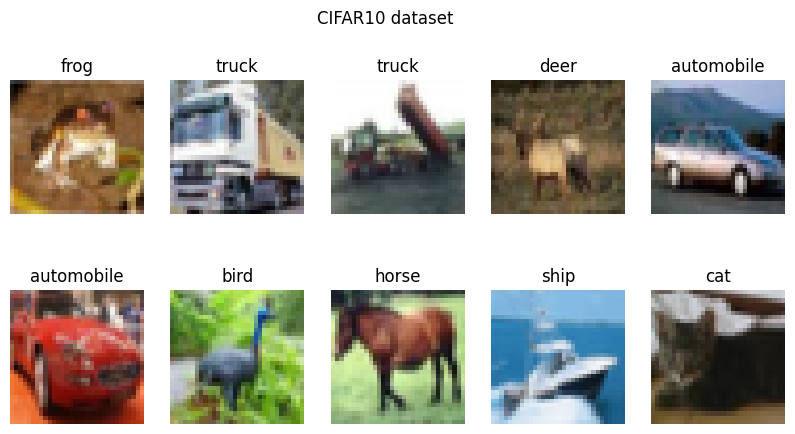

In [50]:
# Plot 10 images from each class
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    img, label = dataset[i]
    ax = axs[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(dataset.classes[label])
    ax.axis('off')

# set title
fig.suptitle('CIFAR10 dataset')

# save the plot
plt.savefig(f'{RESULTS_DIR}/cifar10.png')

In [51]:
# define data transformations & normalize CIFAR10 dataset
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

transform = T.Compose([
    T.Resize((32,32)),
    T.ToTensor(),
    #T.Normalize(mean, std)
])

# apply data transformations to the training and testing sets
train_dataset = torchvision.datasets.CIFAR10(root='data/', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='data/', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


### 3.2 Network

In [52]:
class Net(nn.Module):
    def __init__(self, normalization=False):
        super(Net, self).__init__()
        self.normalization = normalization
        # convolution block
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5, 5), padding=0, stride=1)
        self.norm1 = nn.BatchNorm2d(num_features=6)
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), padding=0, stride=1)
        self.norm2 = nn.BatchNorm2d(num_features=16)
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        # fully connected block
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        # convolution block
        x = self.conv1(x)
        if self.normalization:
            x = self.norm1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        if self.normalization:
            x = self.norm2(x)
        x = F.relu(x)
        x = self.pool2(x)
        # flatten the signal    
        x = x.view(x.size(0), -1)
        # fully connected block
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) 
    
        return x

### 3.3 Training

In [53]:
def train(model, criterion, optimizer, train_loader, test_loader, num_epochs=10, use_gpu=False):

    # move the model to the device (CPU or GPU)
    if use_gpu and torch.cuda.is_available():
        model = model.cuda()
        criterion = criterion.cuda()

    # create empty lists to store accuracy for each epoch
    train_acc = []
    test_acc = []

    # iterate over epochs
    for epoch in tqdm(range(num_epochs), desc='Training', unit='epoch'):

        # set the model to training mode
        model.train()

        running_loss = 0.0
        running_correct = 0.0
        for step, [example, label] in enumerate(train_loader):
            
            # move the data to the device (CPU or GPU)
            if use_gpu and torch.cuda.is_available():
                example = example.cuda()
                label = label.cuda()

            # zero the parameter gradients - prevent accumulation of gradients
            optimizer.zero_grad()

            # forward pass
            prediction = model(example)
            loss = criterion(prediction, label)

            # backward pass
            loss.backward()
            optimizer.step()

            # calculate accuracy on the current training batch
            _, predicted = torch.max(prediction.data, 1)
            running_correct += (predicted == label).sum().item()
            running_loss += loss.item()

        # calculate training accuracy for the current epoch
        train_acc.append(running_correct / len(train_loader.dataset))

        # validate the model
        model.eval()
        correct = 0
        total = 0

        # set the model to evaluation mode
        for idx, [test_example, test_label] in enumerate(tqdm(test_loader, desc='Testing', unit='batch')):
            
            # move the data to the device (CPU or GPU)
            if use_gpu and torch.cuda.is_available():
                test_example = test_example.cuda()
                test_label = test_label.cuda()

            # forward pass
            test_prediction = model(test_example)
            loss = criterion(test_prediction, test_label)

            # get the predicted class label
            _, predicted = torch.max(test_prediction.data, 1)
            total += test_label.size(0)
            correct += (predicted == test_label).sum().item()

        # calculate test accuracy for the current epoch
        test_acc.append(correct / total)

        # print the loss and accuracy
        print("\n *** Summary: Epoch [{} / {}]  Train Accuracy: {}  Test Accuracy: {}***".format(epoch + 1, num_epochs, train_acc[-1], test_acc[-1]))
        torch.save(model.state_dict(), '{}/ConvNet{}.ckpt'.format(RESULTS_DIR, epoch + 1))

    return train_acc, test_acc


In [55]:
# train the model
model = Net(normalization=True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

train_acc, test_acc = train(model, criterion, optimizer, train_loader, test_loader, num_epochs=5, use_gpu=False)

Training:  20%|██        | 1/5 [00:45<03:03, 45.92s/epoch]


 *** Summary: Epoch [1 / 5]  Train Accuracy: 0.45156  Test Accuracy: 0.5261***


Training:  40%|████      | 2/5 [01:32<02:18, 46.25s/epoch]


 *** Summary: Epoch [2 / 5]  Train Accuracy: 0.5582  Test Accuracy: 0.5734***


Plot how the accuracy (i.e. percentage of correctly classified images) of your model evolves for both, the training- and test-set of CIFAR10. Please make sure to add meaningful axis labels for your plot (y-axis as
the accuracy and x-axis as the epoch number).

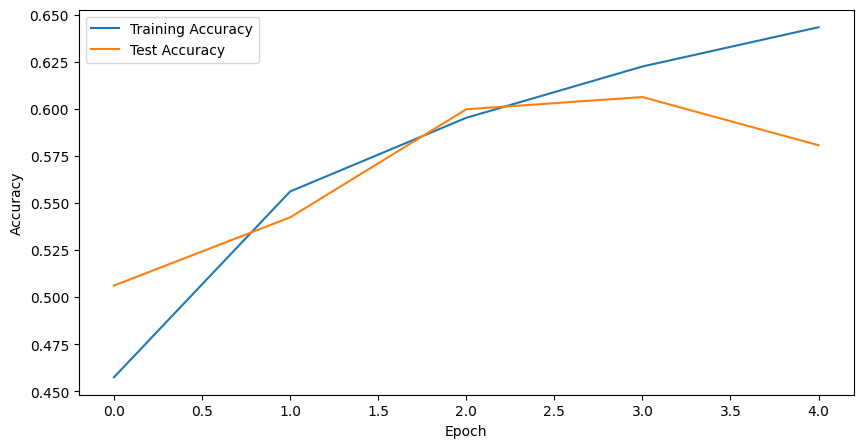

In [ ]:
def plot_accuracy(train_acc, test_acc):
    # plot accuracy versus epoch number
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(test_acc, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# plot the accuracy
plot_accuracy(train_acc, test_acc)

What do you observe in the accuracy plot, in particular if you compare the train and test accuracy? Do you have an explanation for that?

Without the use of normalization or augmentation techniques, the network's performance on the training set is significantly higher than on the test set. This discrepancy suggests that the network may have too many degrees of freedom for the relatively simple CIFAR dataset, leading to high bias or overfitting. In other words, the network may be memorizing the training data rather than learning the underlying patterns that would allow it to generalize to new, unseen data.

To address this issue, regularization techniques such as normalization and data augmentation can be employed. Normalization helps to ensure that the network learns at the same speed everywhere by scaling the input data to a consistent range, while data augmentation increases the variance in the training set, providing the network with more diverse examples to learn from. By using these techniques, we can reduce overfitting and improve the network's ability to generalize to new data.

### 3.4 Augmentation

Please apply random horizontal flipping, random cropping with padding=4, and ColorJitter to the CIFAR10 images and visualize a few pairs of augmented images against their original.

In [ ]:
# define the transformations
transform_aug = T.Compose([
    T.RandomHorizontalFlip(),
    T.RandomCrop(32, padding=4),
    T.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    T.ToTensor(),
    T.Normalize(mean, std)
])

# load the dataset and apply the transformations
train_dataset_aug = torchvision.datasets.CIFAR10(root='data/', train=True, download=True, transform=transform_aug)
test_dataset_aug = torchvision.datasets.CIFAR10(root='data/', train=False, download=True, transform=transform_aug)

train_loader_aug = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
test_loader_aug = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


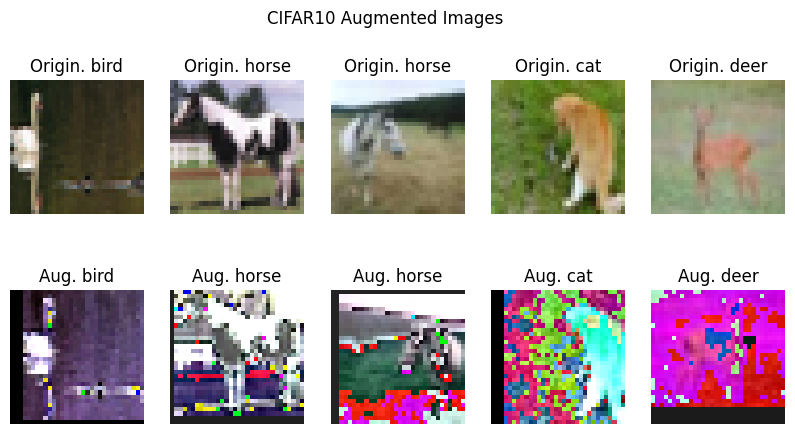

In [ ]:
# visualize a few pairs of augmented images against their original images
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i in range(5):
    # get a random sample from the training set
    index = torch.randint(len(train_dataset), size=(1,))
    img_aug, label_aug = train_dataset_aug[index]
    img, label = train_dataset[index]

    # convert image back from tensor
    if isinstance(img, torch.Tensor) or isinstance(img_aug, torch.Tensor):
        img = img.numpy()
        img_aug = img_aug.numpy()

    # convert images
    img_original = T.ToPILImage()(np.transpose(img, (1, 2, 0)))
    img_augmented = T.ToPILImage()(np.transpose(img_aug, (1, 2, 0)))
    class_name = train_dataset.classes[label]

    # plot the original image
    ax = axs[0, i]
    ax.imshow(img_original)
    ax.set_title(f'Origin. {class_name}')
    ax.axis('off')

    # plot the augmented image
    ax = axs[1, i]
    ax.imshow(img_augmented)
    ax.set_title(f'Aug. {class_name}')
    ax.axis('off')

# set title
fig.suptitle('CIFAR10 Augmented Images')

# save the plot
plt.savefig(f'{RESULTS_DIR}/augmented_images.png')

Train your model using the same setup as above, however, with additional normalization (normalize your input images channel-wise using μ = 0.5 and σ = 0.5) and data augmentation.

In [ ]:
# train the model
model = Net(normalization=True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

train_acc, test_acc = train(model, criterion, optimizer, train_loader_aug, test_loader_aug, num_epochs=5, use_gpu=False)

Training:  20%|██        | 1/5 [00:43<02:55, 43.98s/epoch]


 *** Summary: Epoch [1 / 5]  Train Accuracy: 0.46842  Test Accuracy: 0.4264***


Training:  40%|████      | 2/5 [01:26<02:08, 42.95s/epoch]


 *** Summary: Epoch [2 / 5]  Train Accuracy: 0.57612  Test Accuracy: 0.6019***


Training:  60%|██████    | 3/5 [02:08<01:25, 42.80s/epoch]


 *** Summary: Epoch [3 / 5]  Train Accuracy: 0.61836  Test Accuracy: 0.5963***


Training:  80%|████████  | 4/5 [02:52<00:43, 43.22s/epoch]


 *** Summary: Epoch [4 / 5]  Train Accuracy: 0.64182  Test Accuracy: 0.6113***


Training: 100%|██████████| 5/5 [03:33<00:00, 42.79s/epoch]


 *** Summary: Epoch [5 / 5]  Train Accuracy: 0.66328  Test Accuracy: 0.6201***


Plot the accuracy of this model and the one you trained before over time. Make sure to use proper axis labels and a meaningful legend.

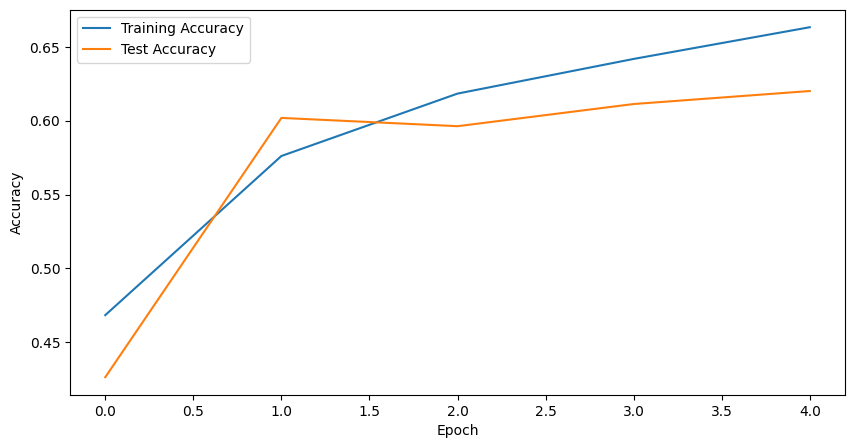

In [ ]:
# plot the accuracy
plot_accuracy(train_acc, test_acc)

Based on your results, provide a brief discussion of why the extra normalization and augmentation improves/harms the performance of your model.

Data augmentation and normalization are two crucial techniques for improving the performance of deep learning models. Augmentation involves artificially increasing the size of the training dataset by applying various transformations to the original images, such as rotation, scaling, and flipping. This not only provides the network with more data to learn from, but also increases the variance in the dataset, making the network more robust to changes in the input.

Normalization, on the other hand, involves scaling the pixel values of the input images to a fixed range, typically between 0 and 1. This ensures that the input data is consistent and well-behaved, which in turn allows the network to learn more effectively and converge faster. By bringing the values of the input image into a specific range, the network can better process and analyze the image, leading to improved performance and accuracy.

Moreover, normalization can help regulate the learning process of the network by ensuring that all input features have the same range and that there are no extreme values that could dominate the gradient updates. This can help prevent overfitting, which occurs when the network becomes too specialized to the training data and fails to generalize to new, unseen examples.

In the above experiment, it an improvement in accuracy is observable for the test dataset. This might be due to a significant reduction in overfitting due to the use of data augmentation and normalization. The network was able to learn more effectively and generalize better to new examples, resulting in improved performance and accuracy.

---
## Task 4: Activation and Saliency Maps

In this task, we will try to visualize what CNNs learn by means of the activation
map, which is considered to be more informative than just visualizing e.g. the
kernel weights.

### 4.1 Instantiate a pre-traind ResNet18

In [ ]:
from torchvision.models import resnet18

# 1. instantiate a pre-trained ResNet18
model = resnet18(pretrained=True)
# set the model to evaluation mode
model.eval()

# print the model architecture
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/Users/janinaalicamattes/miniforge3/envs/pytorch-py11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/janinaalicamattes/miniforge3/envs/pytorch-py11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# test -- print a convolutional layer information
print(model.layer3[0].downsample[1])

BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


### 4.2 Intermediate Activation Maps

In [ ]:
import torchvision.utils as V
import matplotlib.pyplot as plt
import  torchvision.transforms as transforms

# check for gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# load the provided image and get the output
img = Image.open('./data/pug.jpg')
#define transforms to preprocess input image into format expected by model
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
transform = T.Compose([T.Resize((224, 224)), T.ToTensor(), normalize])
X = transform(img).unsqueeze(dim=0).to(device)

# extract intermediate activations
# e.g., the out after the first conv in the first residual block and 
# the out after the last conv in the last residual block
activations = {}
def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

# register the hooks
h1 = model.avgpool.register_forward_hook(get_activation('avgpool'))
h2 = model.maxpool.register_forward_hook(get_activation('maxpool'))
h3 = model.layer3[0].downsample[1].register_forward_hook(get_activation('comp'))
h4 = model.layer4[1].conv2.register_forward_hook(get_activation('conv2'))

# perform the forward pass -- getting the outputs
output = model(X)

# print the shape of the intermediate activations
print(activations['avgpool'].shape)

# detach the hooks
h1.remove()
h2.remove()
h3.remove()
h4.remove()

torch.Size([1, 512, 1, 1])


In [ ]:
# print shape of all the intermediate activations
for key in activations:
    print(f'{key} shape: {activations[key].shape}')

maxpool shape: torch.Size([1, 64, 56, 56])
comp shape: torch.Size([1, 256, 14, 14])
conv2 shape: torch.Size([1, 512, 7, 7])
avgpool shape: torch.Size([1, 512, 1, 1])


### 4.3 Visualize the Activation Maps

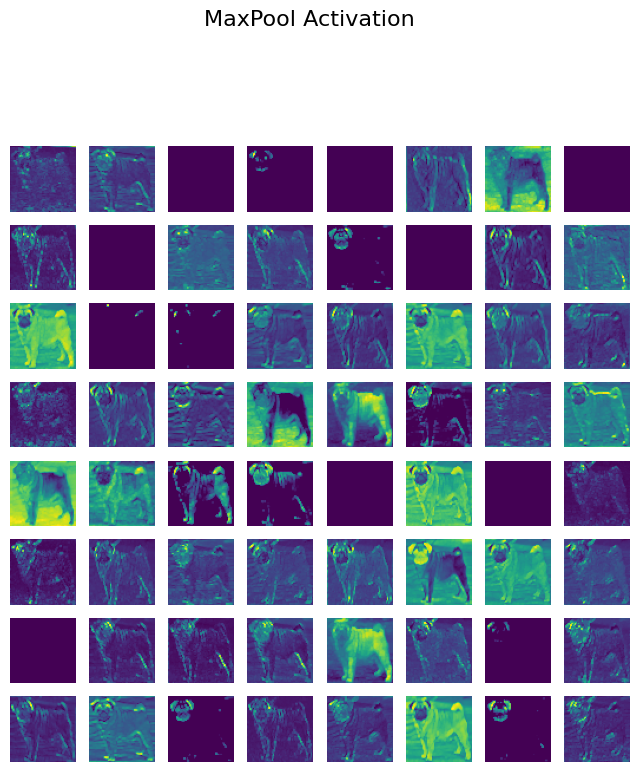

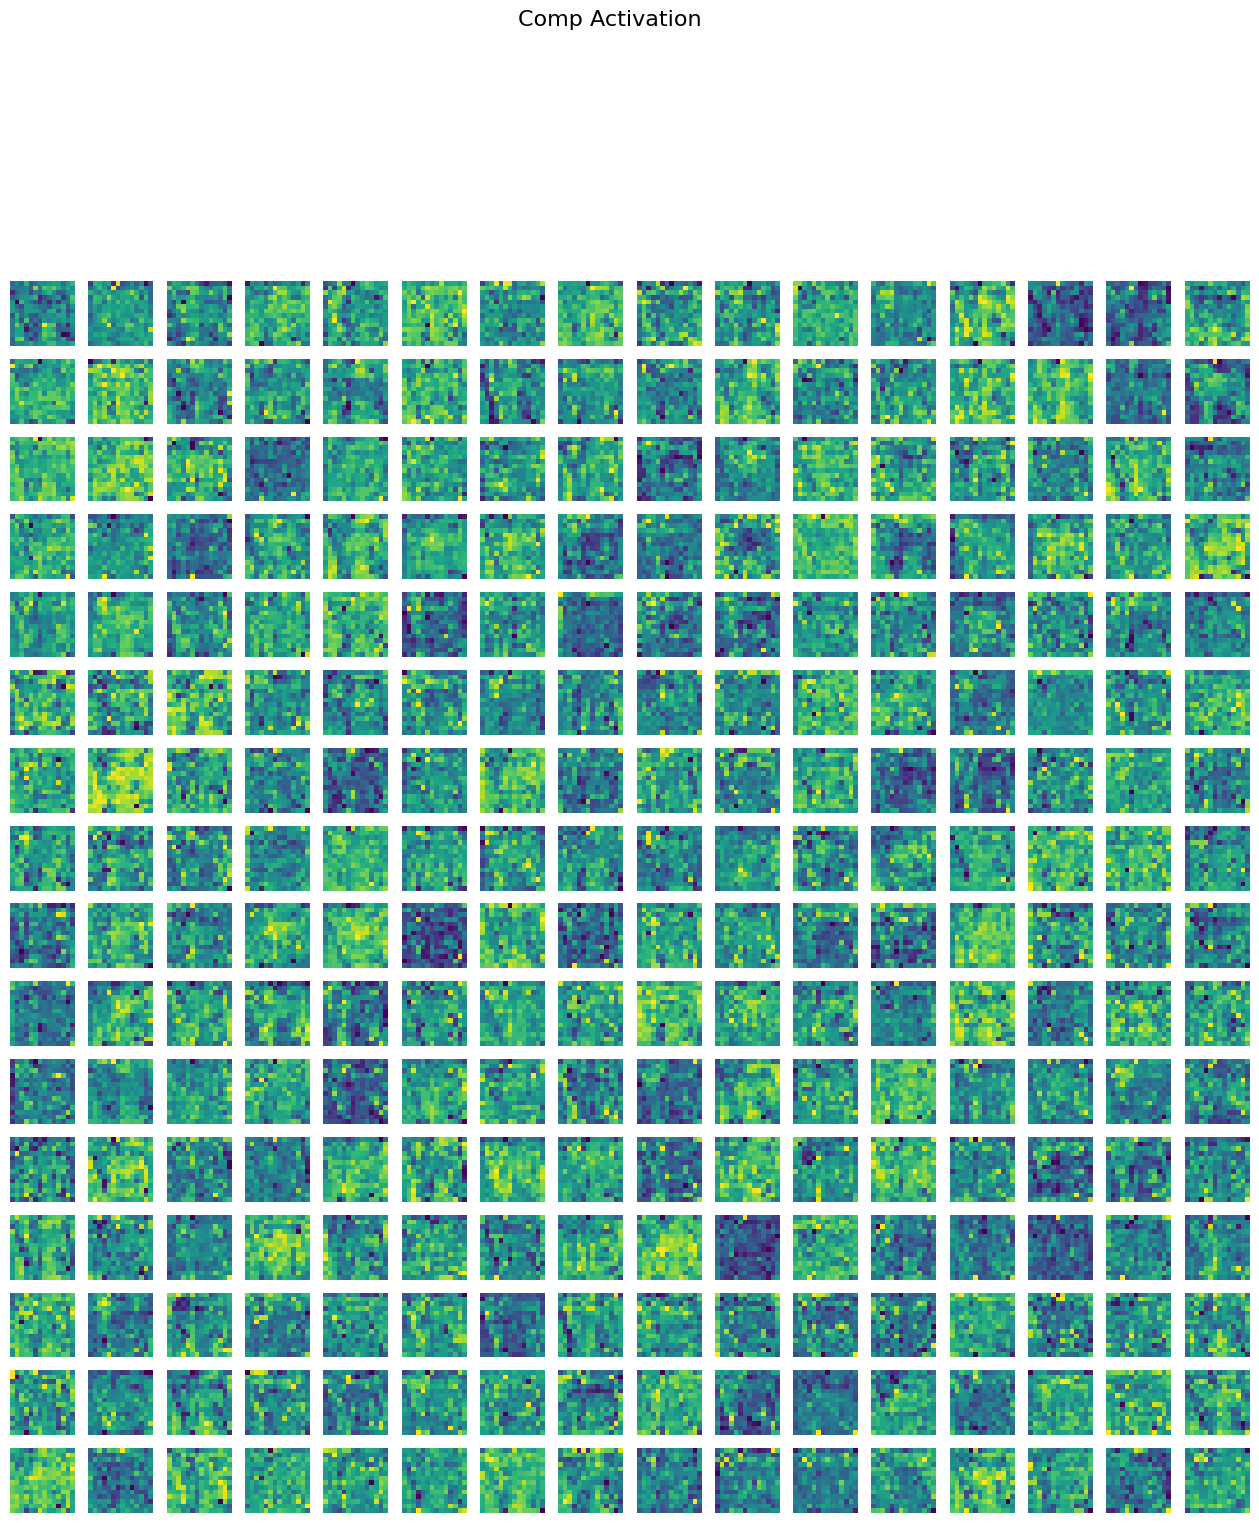

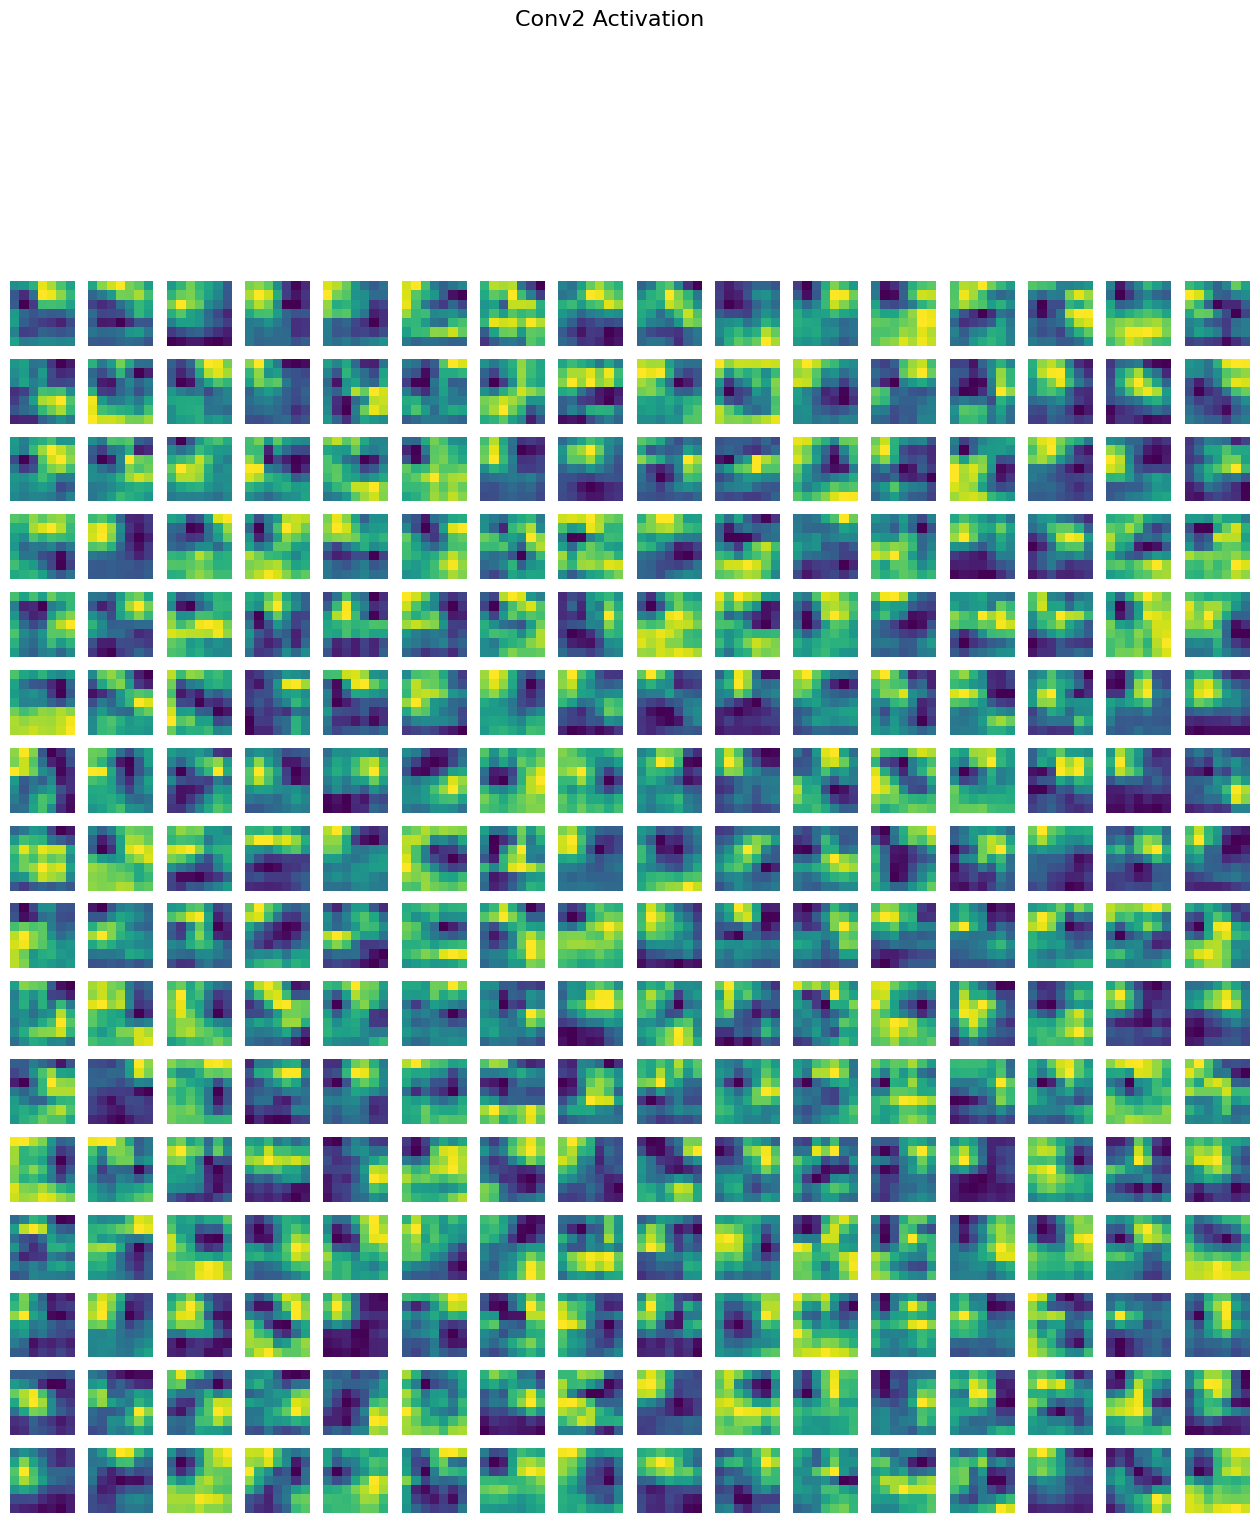

In [ ]:
import matplotlib.pyplot as plt

# Extract the activations for each layer
maxpool_act = activations['maxpool'].squeeze(0)
comp_act = activations['comp'].squeeze(0)
conv2_act = activations['conv2'].squeeze(0)
avgpool_act = activations['avgpool'].squeeze(0)

# Plot the activations for the maxpool layer
fig, axarr = plt.subplots(8, 8, figsize=(8, 8))
fig.suptitle('MaxPool Activation', fontsize=16, y=1.05)  # Add title to the figure
# title to figure
for idx in range(64):
    axarr[idx // 8, idx % 8].imshow(maxpool_act[idx, :, :], cmap='viridis')
    axarr[idx // 8, idx % 8].axis('off')
plt.show()

# Plot the activations for the comp layer
fig, axarr = plt.subplots(16, 16, figsize=(16, 16))
fig.suptitle('Comp Activation', fontsize=16, y=1.05)  # Add title to the figure
for idx in range(256):
    axarr[idx // 16, idx % 16].imshow(comp_act[idx, :, :], cmap='viridis')
    axarr[idx // 16, idx % 16].axis('off')
plt.show()

# Plot the activations for the conv2 layer
fig, axarr = plt.subplots(16, 16, figsize=(16, 16))
fig.suptitle('Conv2 Activation', fontsize=16, y=1.05)  # Add title to the figure
for idx in range(256):
    axarr[idx // 16, idx % 16].imshow(conv2_act[idx, :, :], cmap='viridis')
    axarr[idx // 16, idx % 16].axis('off')
plt.show()

### 4.4 Plot Image and Activation Map

In [ ]:
img = np.array(img)
print(img.shape)

(824, 1034, 3)


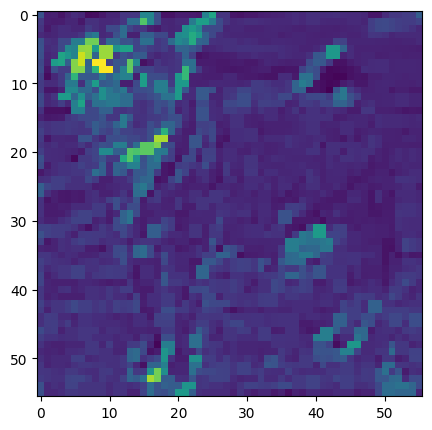

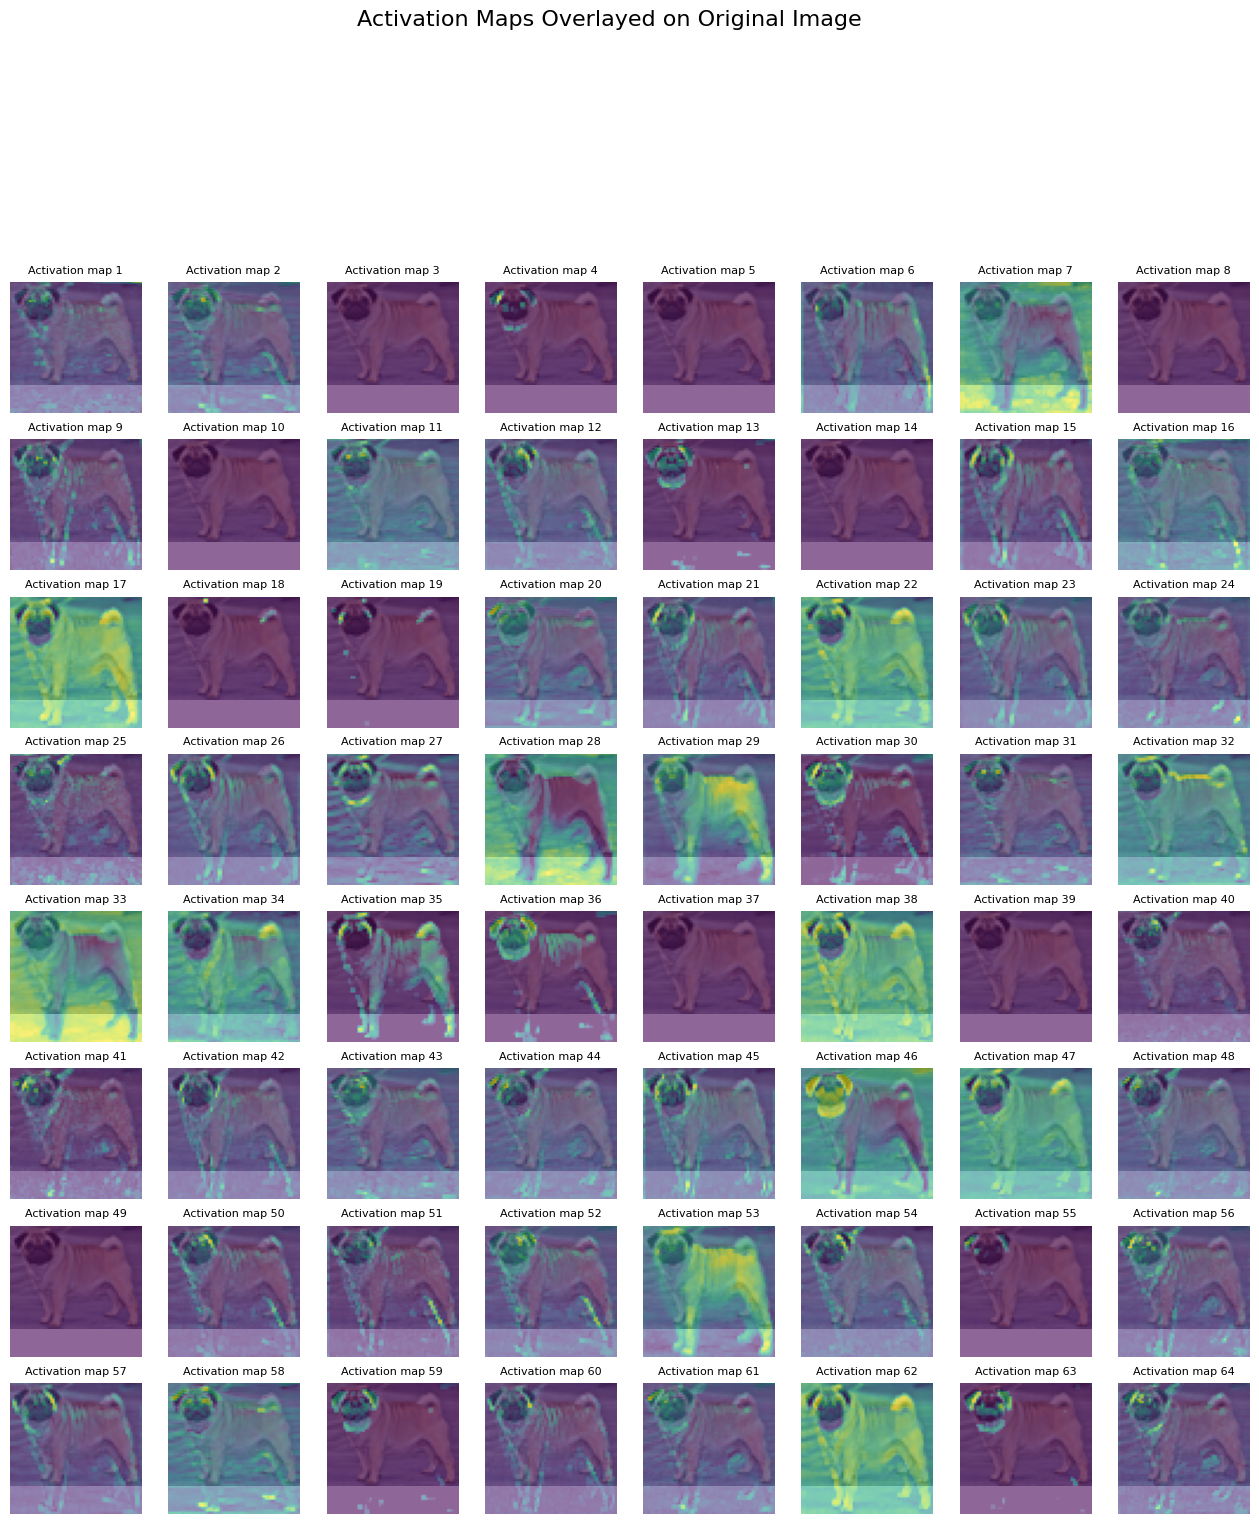

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Resize the original image to have the same height and width as the activation maps
resize_factor = min(maxpool_act.shape[1] / img.shape[1], maxpool_act.shape[2] / img.shape[2])
resized_height = int(img.shape[0] * resize_factor)
resized_width = int(img.shape[1] * resize_factor)
if resized_height > 0 and resized_width > 0:
    resized_img = np.array(Image.fromarray(img).resize((resized_width, resized_height)))
else:
    print("Error: resized image has a height or width of zero or less")
    resized_img = None

# Convert the activation maps to heatmaps
heatmaps = []
for i in range(maxpool_act.shape[0]):
    heatmap = plt.imshow(maxpool_act[i], cmap='viridis')
    heatmaps.append(heatmap)

# Overlay the heatmaps on the original image and plot in a grid
if resized_img is not None:
    num_cols = 8
    num_rows = np.ceil(maxpool_act.shape[0] / num_cols).astype(np.int32)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))
    fig.suptitle('Activation Maps Overlayed on Original Image', fontsize=16, y=1.05)
    for i in range(maxpool_act.shape[0]):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]
        ax.imshow(resized_img)
        ax.imshow(maxpool_act[i], cmap='viridis', alpha=0.6)
        ax.set_title(f'Activation map {i + 1}', fontsize=8)
        ax.axis('off')
    plt.show()
else:
    print("Error: cannot overlay heatmaps on original image")


### 4.5 Saliency Map
Introduced in: *Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps*

In [ ]:
# illustrate how gather() works
def gather_example():
    N, C = 4, 5
    s = torch.randn(N, C)
    y = torch.LongTensor([1, 2, 1, 3])
    print(s)
    print(y)
    print(s.gather(1, y.view(-1, 1)).squeeze())
gather_example()

# load the images
names = ['catdog_243.png', 'catdog_243.png', 'snake_56.png', 'spider_72.png']

# merge names with the path
names = [f'./data/{name}' for name in names]

X = [np.array(Image.open(name).convert('RGB')) for name in names]
y = [int(s.rsplit('_')[1].rsplit('.')[0]) for s in names]

# intentionally change the label to a wrong one
y[1] = 285

def preprocess(img, size=224):
    transform = T.Compose([
        T.Resize(size),
        T.ToTensor(),
        T.Lambda(lambda x: x[None]),  # equivalent to unsqueeze()
    ])
    return transform(img)

tensor([[ 0.1899, -0.6072,  0.1361,  0.9758,  0.4135],
        [-0.7803,  0.7713,  0.3468, -0.8428, -1.6304],
        [ 0.4518, -1.5922, -1.0456,  1.1665, -0.3299],
        [ 1.1794, -0.0566, -0.2523,  0.0968,  1.0805]])
tensor([1, 2, 1, 3])
tensor([-0.6072,  0.3468, -1.5922,  0.0968])


#### a) Complete the saliency map function.

In [ ]:
def saliency_maps(X, y, model):
    """
    Compute a class saliency map using the model for images X and labels y.

    Input:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; LongTensor of shape (N,)
    - model: A pretrained CNN that will be used to compute the saliency map.

    Returns:
    - saliency: A Tensor of shape (N, H, W) giving the saliency maps for the input
    images.
    """
    # don't compute gradients
    for param in model.parameters():
        param.requires_grad = False

    # Make sure the model is in "test" mode
    model.eval()
    
    # Wrap the input tensors in Variables
    X_var = X.clone().detach()
    # if not tensor
    if not isinstance(X_var, torch.Tensor):
        X_var = torch.tensor(X_var)
        
    # calculate gradient of highest score w.r.t input
    X_var.requires_grad = True
    y_var = y.clone().detach()
    saliency = None
    
    # forward pass
    prediction = model(X_var)
    loss = F.cross_entropy(prediction, y_var)

    # backward pass
    loss.backward()

    # compute the saliency map
    saliency = X_var.grad.data.abs().mean(dim=1)
    # normalize the saliency map
    saliency = (saliency - saliency.min()) / (saliency.max() - saliency.min())

    return saliency

#### b) Visualize the original images together with the saliency maps.

Visualize the original image with the saliency maps together and provide a short discussion on why different ground truth labels with even the same input image would yield different saliency maps, for instance, the catdog_243.png image with y = 243 (bull mastiff) and y = 285 (Egyptian cat).

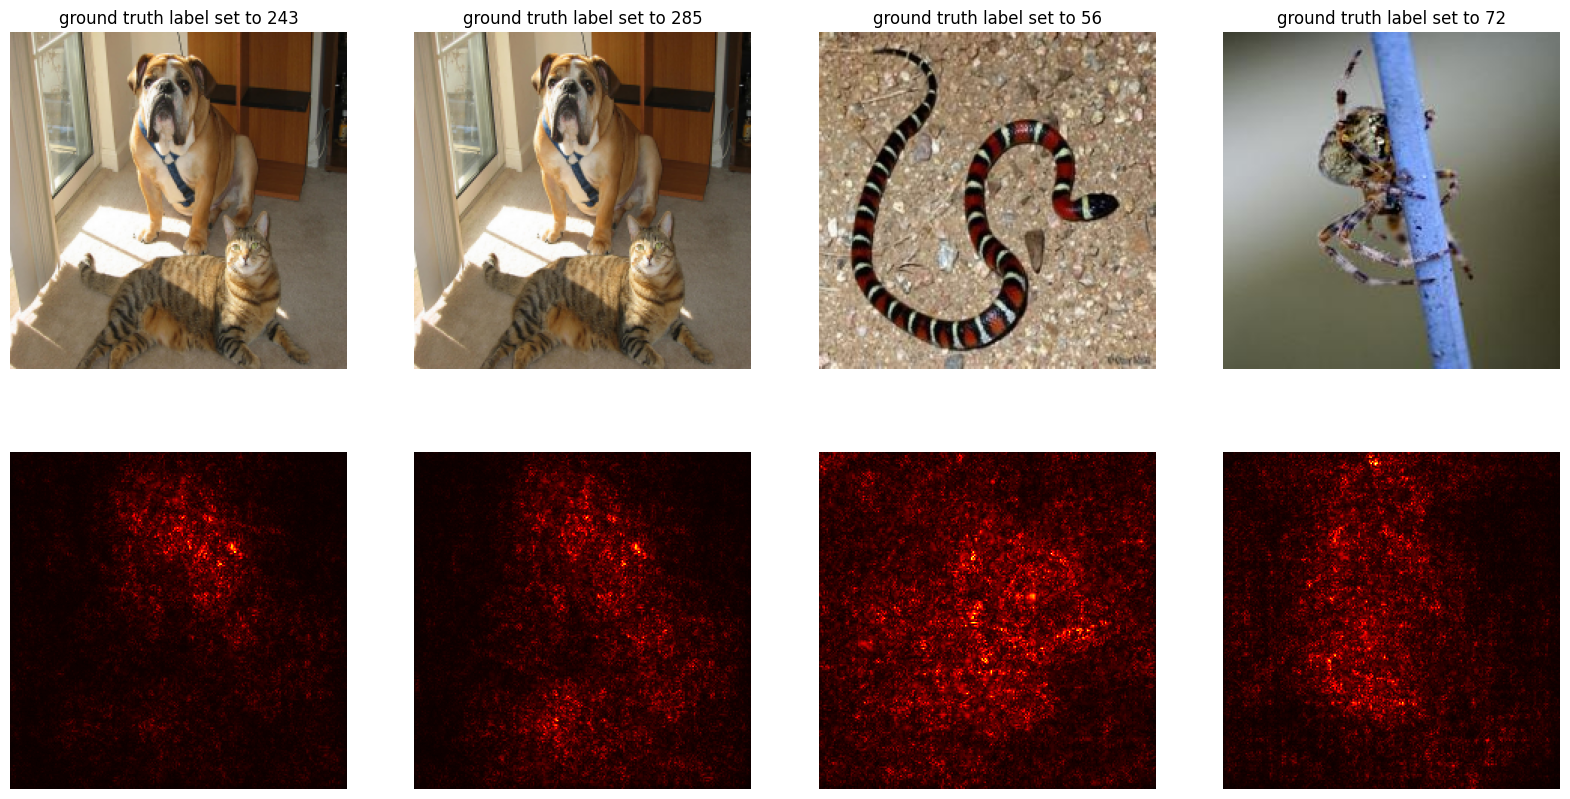

In [ ]:
# Please use the same pre-trained network from the previous task for this task
model = resnet18(pretrained=True)

# if you finished the task 3.1 and defined your model, then this function should run flawlessly
def show_saliency_maps(X, y):
    # Convert X and y from numpy arrays to Torch Tensors
    X_tensor = torch.cat([preprocess(Image.fromarray(x)) for x in X], dim=0)
    y_tensor = torch.LongTensor(y)
    # Compute saliency maps for images in X
    saliency = saliency_maps(X_tensor, y_tensor, model)

    # Convert the saliency map from Torch Tensor to numpy array and show images
    # and saliency maps together.
    saliency = saliency.numpy()
    N = len(X)
    for i in range(N):
        plt.subplot(2, N, i + 1)
        plt.imshow(X[i])
        plt.axis('off')
        plt.title('ground truth label set to {}'.format(y[i]))
        plt.subplot(2, N, N + i + 1)
        plt.imshow(saliency[i], cmap=plt.cm.hot)
        plt.axis('off')
        plt.gcf().set_size_inches(20, 10)
    plt.show()

show_saliency_maps(X, y)

**Discussion**

**Visualize the original image with the saliency maps together and provide a short discussion on why different ground truth labels with even the same input image would yield different saliency maps, for instance the _catdog_243.png_ image with y = 243 (bull mastiff) and y = 285
(Egyptian cat).**



Visualising the original image with the saliency maps can help understand how the model makes its predictions. In the case of the catdog_243.png image, it can be seen that the model focuses on different salient features depending on the ground truth label chosen for the backward pass.

When the ground truth is set to y=243 (Bullmastiff), the saliency map highlights the features of the dog in the input image, such as its muzzle, ears, and coat. This indicates that the model is using these features to distinguish the Bullmastiff from other elements in the image.

Conversely, when the ground truth is set to y=285 (Egyptian cat), the saliency map emphasizes the features of the reclining cat, such as its eyes, whiskers, and fur. This suggests that the model is using these features to distinguish the Egyptian cat from other elements in the image, including the dog.

Interestingly, we can also observe that the saliency map for the Egyptian cat contains some pixels from the dog's fur. This may be due to the fact that the model is using the contrast between the cat's and the dog's fur to distinguish between the two animals. Additionally, the wider spread of the saliency map pixels highlighted for the Egyptian cat could be caused by the fact that the model was actively labeled with the "incorrect" label of Egyptian cat, whereas in the training data, the label was possibly set to Bullmastiff if two objects of different categories appeared in the same image. In this case, the model may be incorporating the salient features of the cat in order to distinguish the expected class.

This experiment further shows how saliency maps can be used to interpret the decisions of a deep learning model.


---